In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

***3 libaries are required to preprocess the data***

***1.understand/import the dataset***

***2.visualize datasets***

***3.handling missing/null values***

***4.handling outlier***

***5.visualize new dataset***

In [73]:
df=pd.read_csv("Advertising.csv")

# this dataset shows only numberical values,first column name is undefined.
# this problem is prediction problem cause columns contains continues values.

In [74]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [75]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [76]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [77]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [78]:
df.shape

(200, 4)

In [79]:
df.size

800

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [81]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


***this dataset is in normal distribution***

***radio is stable***

In [82]:
import seaborn as sns

In [83]:
columns=["TV","radio","newspaper","sales"]


C:\Users\st\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TV'>

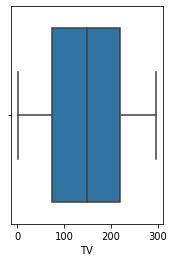

In [84]:
plt.subplot(122)
sns.boxplot(df["TV"])

C:\Users\st\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='radio'>

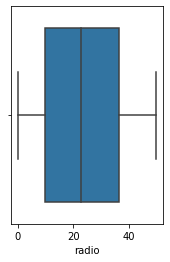

In [85]:
plt.subplot(122)
sns.boxplot(df["radio"])

C:\Users\st\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newspaper'>

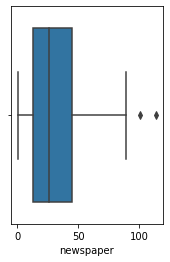

In [86]:
plt.subplot(122)
sns.boxplot(df["newspaper"])

C:\Users\st\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales'>

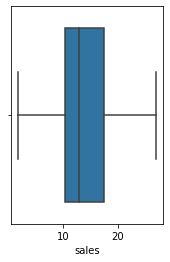

In [87]:
plt.subplot(122)
sns.boxplot(df["sales"])

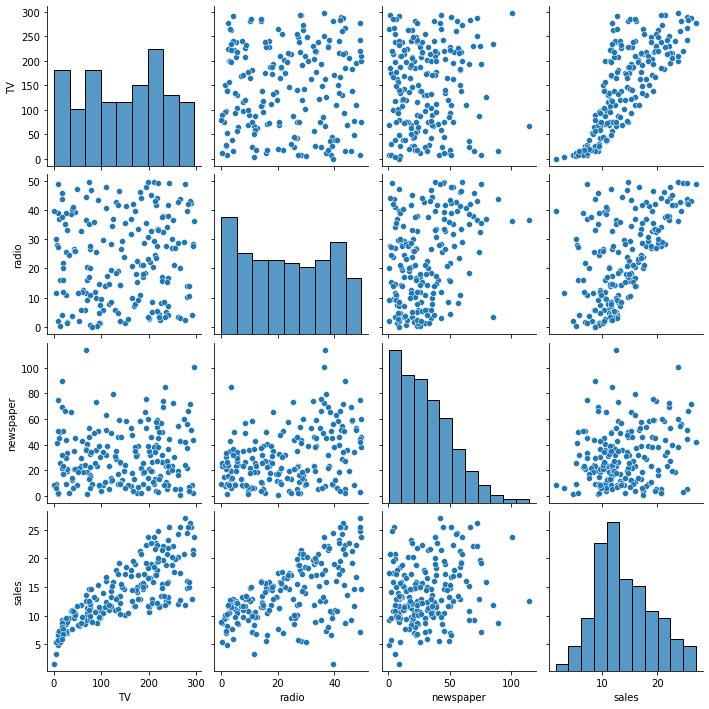

In [88]:
sns.pairplot(df)

***we can see sales and tv have positive correlation***

In [89]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [90]:
x=df[["TV","radio"]]

In [91]:
x

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [92]:
y=df[["sales"]]

In [93]:
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [94]:
from sklearn.preprocessing import PolynomialFeatures
pol=PolynomialFeatures(2,include_bias=False)
x_pol=pol.fit(x).transform(x)

In [95]:
x_pol

array([[2.301000e+02, 3.780000e+01, 5.294601e+04, 8.697780e+03,
        1.428840e+03],
       [4.450000e+01, 3.930000e+01, 1.980250e+03, 1.748850e+03,
        1.544490e+03],
       [1.720000e+01, 4.590000e+01, 2.958400e+02, 7.894800e+02,
        2.106810e+03],
       [1.515000e+02, 4.130000e+01, 2.295225e+04, 6.256950e+03,
        1.705690e+03],
       [1.808000e+02, 1.080000e+01, 3.268864e+04, 1.952640e+03,
        1.166400e+02],
       [8.700000e+00, 4.890000e+01, 7.569000e+01, 4.254300e+02,
        2.391210e+03],
       [5.750000e+01, 3.280000e+01, 3.306250e+03, 1.886000e+03,
        1.075840e+03],
       [1.202000e+02, 1.960000e+01, 1.444804e+04, 2.355920e+03,
        3.841600e+02],
       [8.600000e+00, 2.100000e+00, 7.396000e+01, 1.806000e+01,
        4.410000e+00],
       [1.998000e+02, 2.600000e+00, 3.992004e+04, 5.194800e+02,
        6.760000e+00],
       [6.610000e+01, 5.800000e+00, 4.369210e+03, 3.833800e+02,
        3.364000e+01],
       [2.147000e+02, 2.400000e+01, 4.60960

***we considering sales & tv data***

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
xtrain, xtest, ytrain, ytest = train_test_split(x_pol,y,test_size=0.25,random_state=0)

In [98]:
xtrain.shape

(150, 5)

In [99]:
xtest.shape

(50, 5)

In [100]:
ytrain.shape

(150, 1)

In [101]:
ytest.shape

(50, 1)

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
model=LinearRegression(fit_intercept=True)

***linear regression parameters***

In [104]:
model.fit(xtrain,ytrain)

LinearRegression()

In [105]:
model.intercept_

array([5.23515686])

In [106]:
model.coef_

array([[ 0.04989176,  0.02692461, -0.000104  ,  0.00104167,  0.00028328]])

In [107]:
yp=model.predict(xtest)
yp

array([[10.33837175],
       [ 8.42436162],
       [ 8.93184075],
       [25.37138953],
       [12.32425343],
       [ 8.20696563],
       [ 8.09849338],
       [13.25632729],
       [ 8.52791687],
       [16.61015964],
       [24.45975855],
       [10.22392613],
       [10.99386205],
       [15.75887623],
       [11.48556815],
       [12.82021799],
       [17.33521621],
       [ 6.8093467 ],
       [14.24707418],
       [17.44821103],
       [25.54563507],
       [10.51773153],
       [15.63576215],
       [13.11764775],
       [ 7.77313993],
       [15.50834848],
       [12.66784669],
       [22.51369976],
       [11.81898431],
       [ 7.97293434],
       [12.08954477],
       [23.30080791],
       [15.53884163],
       [22.21806425],
       [ 6.59394978],
       [ 6.7347266 ],
       [ 8.94817792],
       [13.21387917],
       [13.09092996],
       [ 7.03435839],
       [ 9.87961153],
       [ 8.3445183 ],
       [15.63453068],
       [16.29616378],
       [17.24510256],
       [13

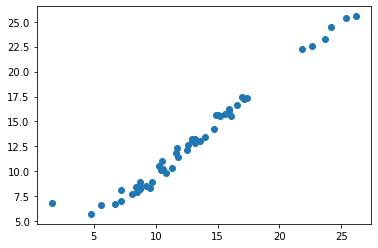

In [108]:
plt.scatter(ytest,yp)


In [109]:
# plt.figure(figsize=[15,5])
# ax=sns.displot(ytest,color='r',label='actual values')
# sns.displot(yp,color='b',label='predicted values',ax=ax)
# plt.title('actual predict vs predicted values')
# plt.show()

In [110]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [111]:
r2=r2_score(ytest,yp)
r2

0.9719269857493544

In [112]:
mse=mean_squared_error(ytest,yp)
mse

0.7912520554536268

In [113]:
mae=mean_absolute_error(ytest,yp)
mae

0.5085512629507849

***assignment:what is vanshing gradient problem?***

C:\Users\st\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales'>

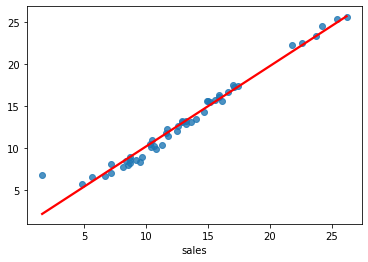

In [114]:
sns.regplot(ytest,yp,line_kws={'color':'red'},ci=None)

***how to increase no of dimension  x->x(sequre) y->y(sequre) xy***

***linear -> non-linear (polynomiyal)***

In [115]:
df1=pd.DataFrame({"x":[10,15,25,30],"y":[12,16,28,35]})

In [116]:
df1

,x,y
0,10,12
1,15,16
2,25,28
3,30,35


In [117]:
a=df1[["x","y"]]
a

,x,y
0,10,12
1,15,16
2,25,28
3,30,35


In [118]:
from sklearn.preprocessing import PolynomialFeatures
pol=PolynomialFeatures(2,include_bias=False)
x_pol1=pol.fit(a).transform(a)

In [119]:
x_pol1

array([[  10.,   12.,  100.,  120.,  144.],
       [  15.,   16.,  225.,  240.,  256.],
       [  25.,   28.,  625.,  700.,  784.],
       [  30.,   35.,  900., 1050., 1225.]])

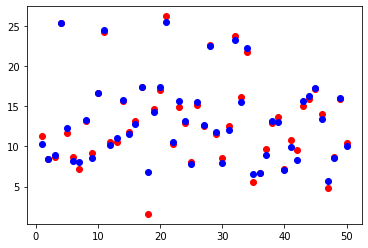

In [120]:
plt.scatter(range(1,len(xtest)+1),ytest,c="r")
plt.scatter(range(1,len(xtest)+1),yp,c="b")
plt.show()

In [121]:
train_error = []
test_error = []
for i in range(5):
    x_train,x_test,y_train,y_test = train_test_split(x,y)

    model.fit(x_train,y_train)

    ytrainp = model.predict(x_train)
    ytestp = model.predict(x_test)

    train_error.append(abs(y_train-ytrainp).mean())
    test_error.append(abs(y_test-ytestp).mean())
train_error

[sales    1.245217
 dtype: float64,
 sales    1.307149
 dtype: float64,
 sales    1.235433
 dtype: float64,
 sales    1.233076
 dtype: float64,
 sales    1.225038
 dtype: float64]

In [122]:
test_error

[sales    1.264428
 dtype: float64,
 sales    1.116002
 dtype: float64,
 sales    1.356204
 dtype: float64,
 sales    1.326259
 dtype: float64,
 sales    1.384599
 dtype: float64]

In [123]:
print(np.array(train_error).mean())
print(np.array(test_error).mean())

1.2491826095695786
1.289498290497086
